<a href="https://colab.research.google.com/github/Sukanya0605/Credit-card-and-fraud-detection-/blob/main/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('credit card.CSV')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1.0


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40773 entries, 0 to 40772
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    40773 non-null  int64  
 1   V1      40773 non-null  float64
 2   V2      40773 non-null  float64
 3   V3      40773 non-null  float64
 4   V4      40773 non-null  float64
 5   V5      40773 non-null  float64
 6   V6      40773 non-null  float64
 7   V7      40773 non-null  float64
 8   V8      40773 non-null  float64
 9   V9      40773 non-null  float64
 10  V10     40773 non-null  float64
 11  V11     40773 non-null  float64
 12  V12     40773 non-null  float64
 13  V13     40772 non-null  float64
 14  V14     40772 non-null  float64
 15  V15     40772 non-null  float64
 16  V16     40772 non-null  float64
 17  V17     40772 non-null  float64
 18  V18     40772 non-null  float64
 19  V19     40772 non-null  float64
 20  V20     40772 non-null  float64
 21  V21     40772 non-null  float64
 22

In [ ]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,40773.0,25887.323744,12677.859385,0.000000,15749.000000,31004.000000,35991.000000,40393.000000
V1,40773.0,-0.218927,1.853479,-56.407510,-0.969752,-0.235832,1.159942,1.960497
V2,40773.0,0.040757,1.598585,-72.715728,-0.529433,0.096929,0.740706,16.713389
V3,40773.0,0.712356,1.497906,-31.103685,0.230869,0.813693,1.445176,4.101716
V4,40773.0,0.187867,1.400266,-5.172595,-0.719246,0.186149,1.070117,16.491217


In [ ]:
data.shape

(40773, 31)

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
fraud_cases=len(data[data['Class']==1])

In [ ]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 109


In [ ]:
non_fraud_cases=len(data[data['Class']==0])

In [ ]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 40663


In [ ]:
fraud=data[data['Class']==1]

In [ ]:
genuine=data[data['Class']==0]

In [ ]:
fraud.Amount.describe()

count     109.000000
mean       93.345872
std       249.691282
min         0.000000
25%         1.000000
50%         3.680000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
genuine.Amount.describe()

count    40663.000000
mean        88.600423
std        237.063037
min          0.000000
25%          7.500000
50%         23.940000
75%         79.950000
max       7879.420000
Name: Amount, dtype: float64

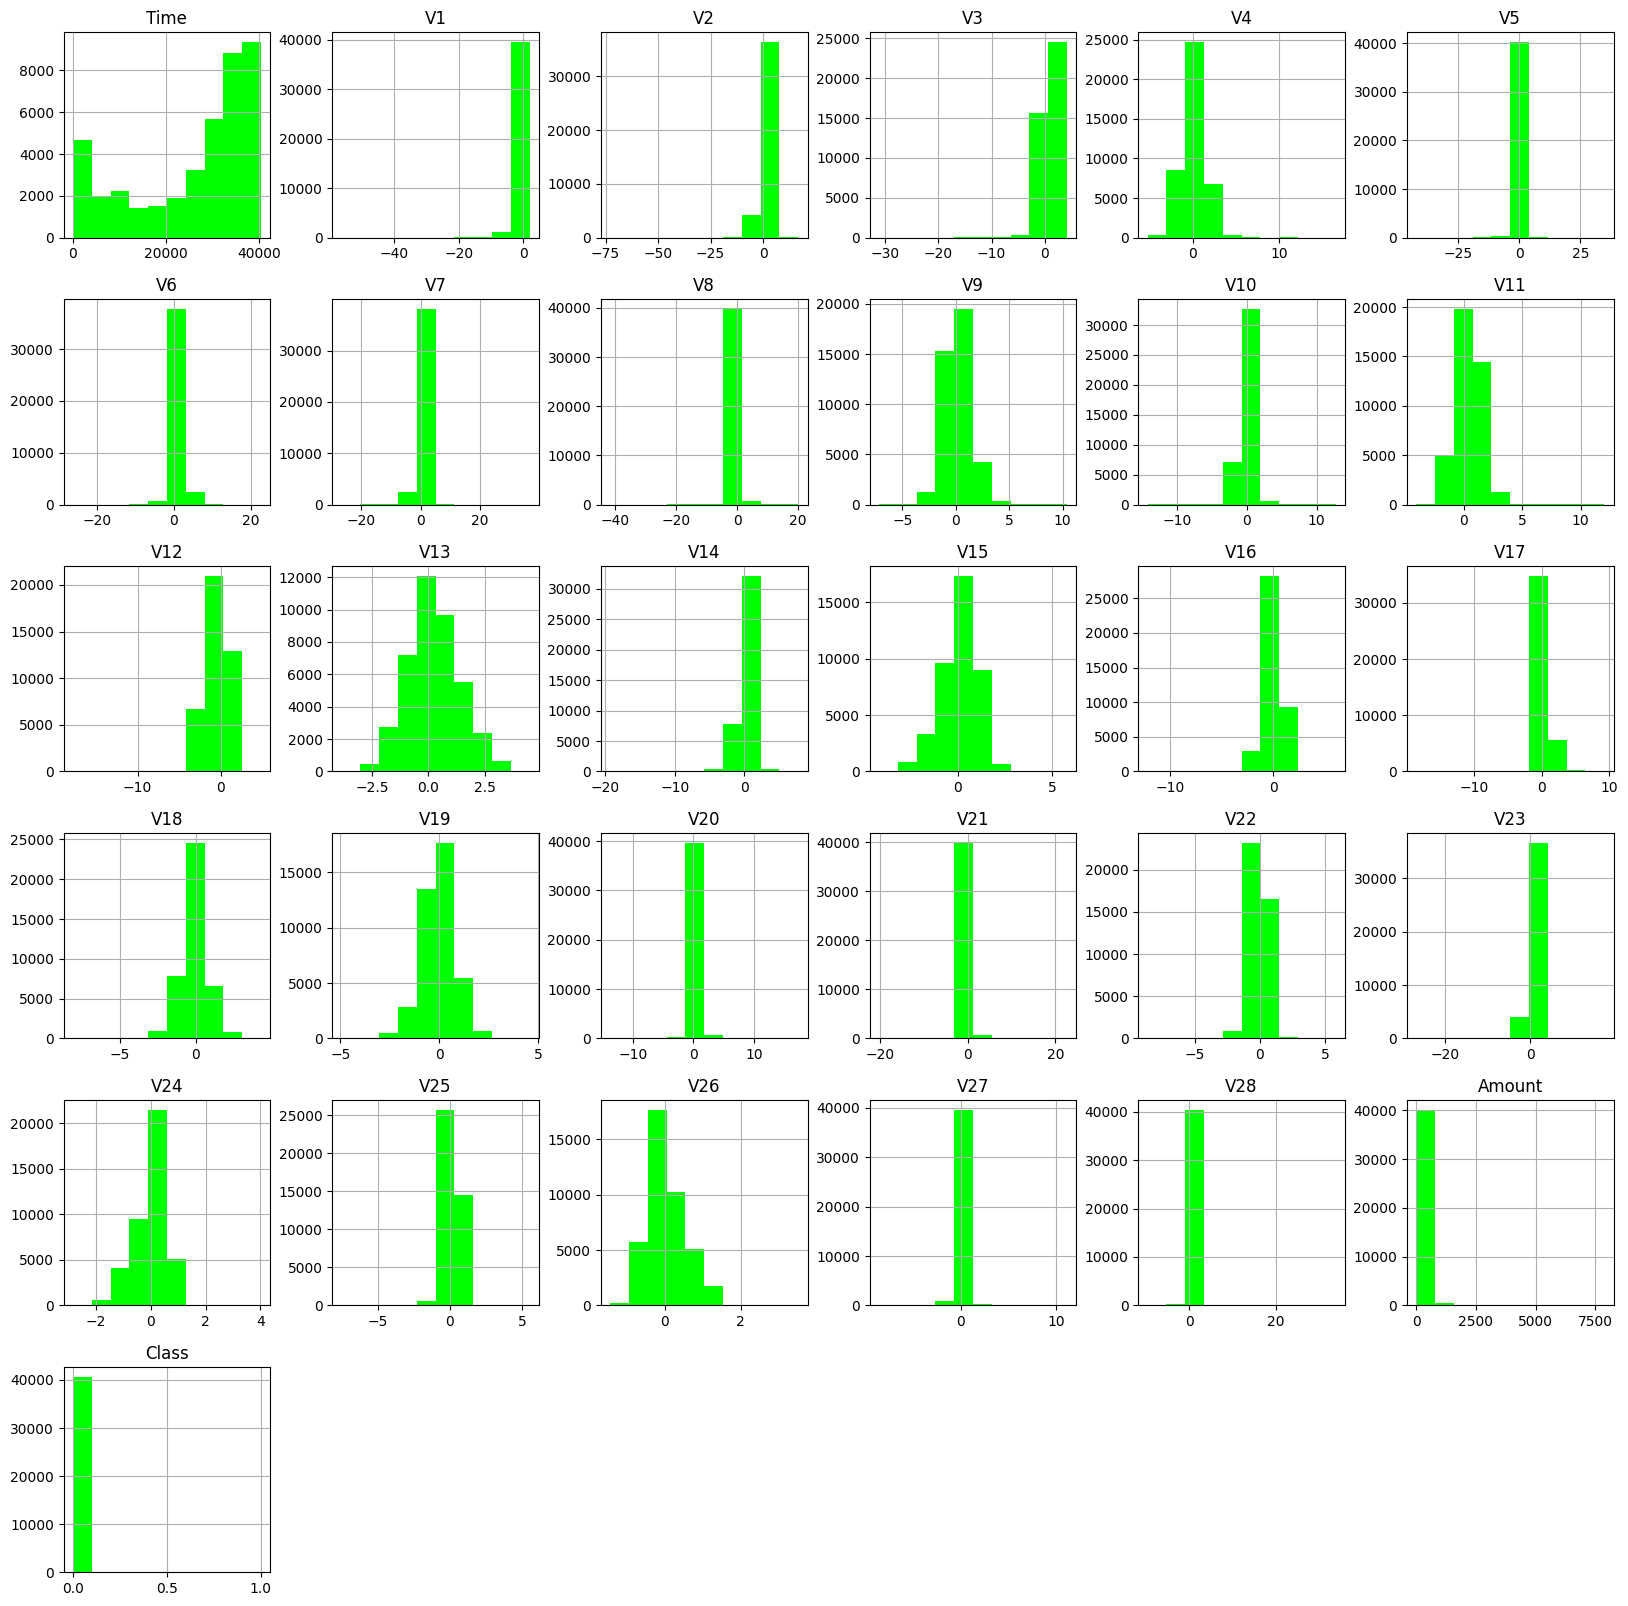

In [ ]:
data.hist(figsize=(20,20),color='lime')
plt.show()


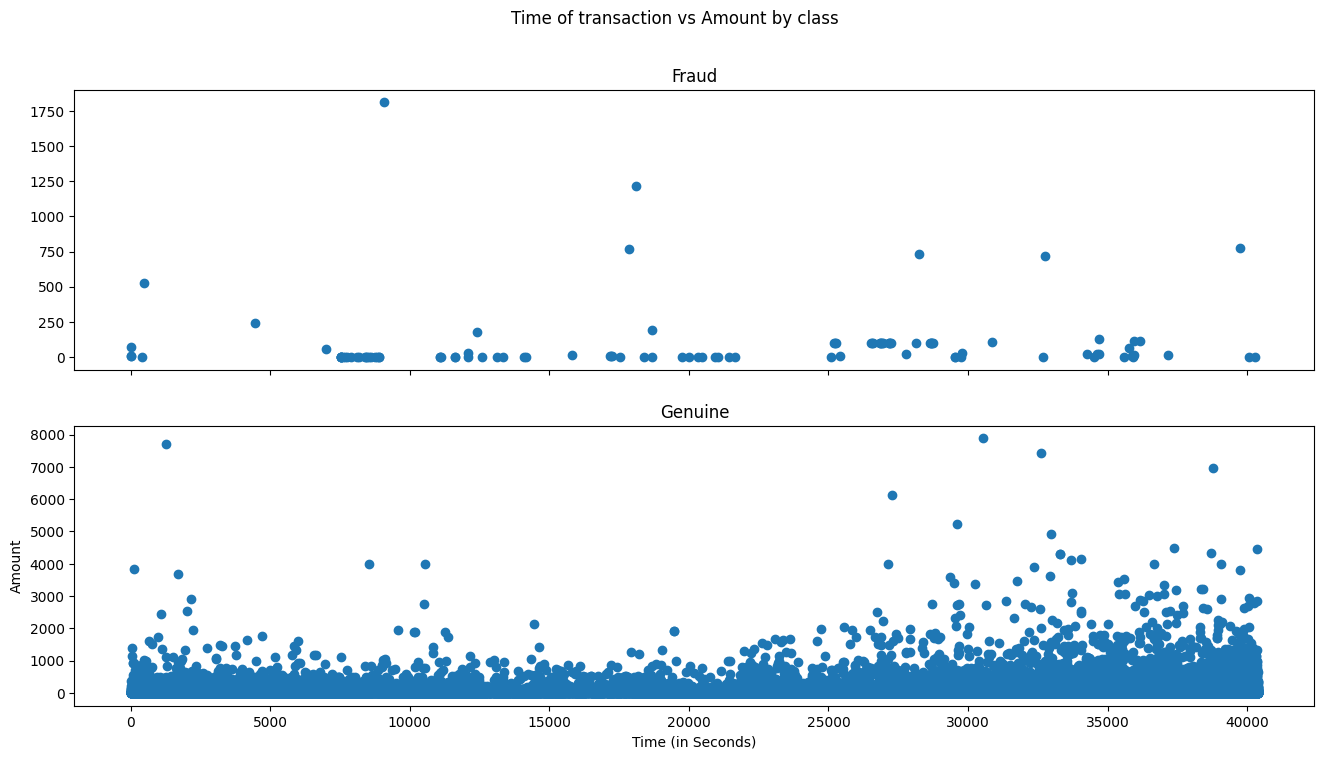

In [ ]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<Axes: >

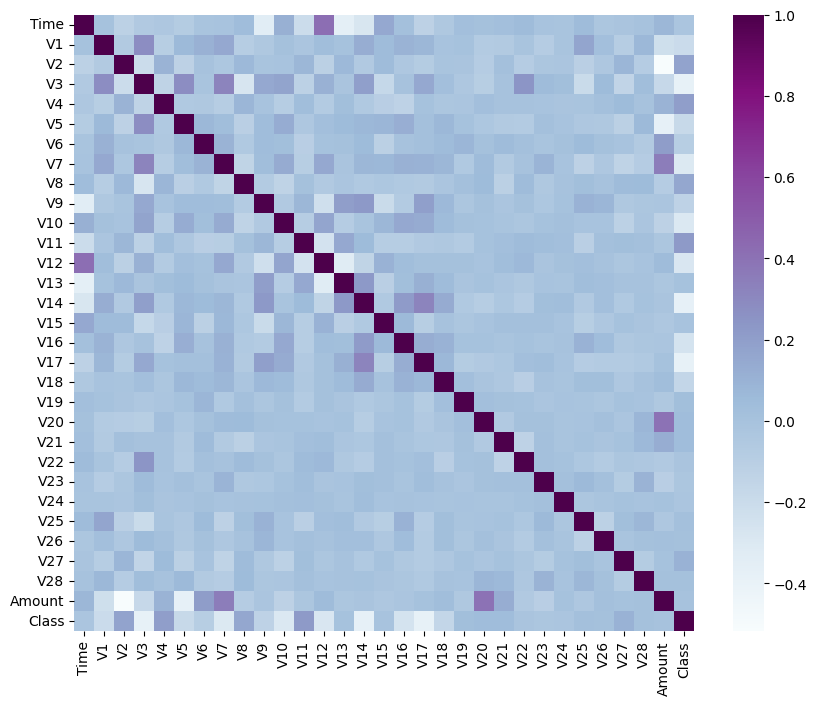

In [ ]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#modules for data cleaning and data analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
#modules for model building
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
 #modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV
#modules for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve
import warnings
warnings.filterwarnings('ignore')
 #setting backend for matplotlib
%matplotlib inline
#setting formatting options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)
 #setting plot style
plt.style.use('seaborn-darkgrid')

In [ ]:
fraud_train = pd.read_csv('credit card.CSV')
fraud_test = pd.read_csv('credit card.CSV')
#concatenating the two datasets
df = pd.concat([fraud_train, fraud_test]).reset_index()
df.drop(df.columns[:2], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0.000000
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.000000
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,1.000000


In [ ]:
df['V1'] = pd.to_datetime(df['V1'])
print(df.dtypes['V1'])
df.head()


datetime64[ns]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1969-12-31 23:59:59.999999999,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0.000000
1,1970-01-01 00:00:00.000000001,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.000000
2,1969-12-31 23:59:59.999999999,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0.000000
3,1970-01-01 00:00:00.000000000,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.000000
4,1969-12-31 23:59:59.999999999,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,1.000000


In [ ]:
df.nunique()

V1           33
V2        39829
V3        39829
V4        39829
V5        39829
V6        39829
V7        39828
V8        39828
V9        39829
V10       39829
V11       39829
V12       39828
V13       39828
V14       39828
V15       39828
V16       39828
V17       39828
V18       39828
V19       39828
V20       39828
V21       39828
V22       39827
V23       39827
V24       39828
V25       39828
V26       39828
V27       39826
V28       39827
Amount    10919
Class         2
dtype: int64

In [ ]:
df['trans_hour'] = df['V1'].dt.hour
#deriving 'day of the week'
df['trans_day_of_week'] = df['V1'].dt.day_name()
#deriving 'year_month'
df['trans_year_month'] = df['V1'].dt.to_period('M')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,trans_hour,trans_day_of_week,trans_year_month
0,1969-12-31 23:59:59.999999999,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0.000000,23,Wednesday,1969-12
1,1970-01-01 00:00:00.000000001,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.000000,0,Thursday,1970-01
2,1969-12-31 23:59:59.999999999,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0.000000,23,Wednesday,1969-12
3,1970-01-01 00:00:00.000000000,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.000000,0,Thursday,1970-01
4,1969-12-31 23:59:59.999999999,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,1.000000,23,Wednesday,1969-12


In [ ]:
df['V2'] = pd.to_datetime(df['V2'])
df['V3'] = np.round((df['V1'] -
df['V2'])/np.timedelta64(1, 'Y'))
df.V3.head()

0   -0.000000
1    0.000000
2    0.000000
3    0.000000
4   -0.000000
Name: V3, dtype: float64

In [ ]:
df.drop(['V1','V4', 'V5', 'V2'] , axis=1, inplace=True)
df.head()

,V3,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,trans_hour,trans_day_of_week,trans_year_month
0,-0.000000,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0.000000,23,Wednesday,1969-12
1,0.000000,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.000000,0,Thursday,1970-01
2,0.000000,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0.000000,23,Wednesday,1969-12
3,0.000000,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.000000,0,Thursday,1970-01
4,-0.000000,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,1.000000,23,Wednesday,1969-12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81546 entries, 0 to 81545
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   V3                 81546 non-null  float64  
 1   V6                 81546 non-null  float64  
 2   V7                 81546 non-null  float64  
 3   V8                 81546 non-null  float64  
 4   V9                 81546 non-null  float64  
 5   V10                81546 non-null  float64  
 6   V11                81546 non-null  float64  
 7   V12                81546 non-null  float64  
 8   V13                81544 non-null  float64  
 9   V14                81544 non-null  float64  
 10  V15                81544 non-null  float64  
 11  V16                81544 non-null  float64  
 12  V17                81544 non-null  float64  
 13  V18                81544 non-null  float64  
 14  V19                81544 non-null  float64  
 15  V20                81544 non-null  f

In [ ]:
# Create the cross validation framework
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
kf = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)


In [ ]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [ ]:
#read the dataset
dataset = pd.read_csv("credit card.CSV")
# read the first 5 and last 5 rows of the data
dataset.head().append(dataset.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0.000000
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.000000
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0.000000
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.000000
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,1.000000
40768,40392,0.180367,-2.320091,-2.393357,-0.099322,1.438798,3.376369,0.420557,0.468550,-1.594167,0.669268,-0.379698,-0.284688,0.296604,0.708456,0.767058,-1.264489,-0.547971,1.551501,-0.903619,0.884375,-0.019143,-1.169199,-0.669946,0.998749,0.653483,-0.332582,-0.104583,0.122331,653.560000,0.000000
40769,40393,-0.347533,0.462031,0.413834,-1.403547,0.251277,-0.201277,0.706570,-0.173221,-1.638856,-0.182500,-0.389412,-0.704181,1.084273,-1.255112,0.696604,1.175968,0.937125,-1.605292,0.756624,0.183176,-0.217763,-0.738272,0.144049,-0.878037,-0.615576,-0.686502,0.064940,0.161659,80.650000,0.000000
40770,40393,1.071611,0.067492,0.283197,1.243709,0.024615,0.109673,0.129178,-0.026332,0.126973,-0.147706,-0.682271,0.743529,0.845053,-0.036281,0.386927,-0.293810,-0.155941,-0.844177,-0.323537,0.020306,-0.165087,-0.433136,-0.080091,-0.423704,0.522372,-0.446441,0.036590,0.030713,73.100000,0.000000
40771,40393,-2.687835,1.069146,1.543733,-1.521685,-0.041831,0.331681,1.302125,-0.826599,0.741611,4.350821,1.695216,-0.201352,0.000991,-1.528443,0.758162,-1.785771,-0.831674,0.861643,-0.811404,0.909401,-1.271315,-1.318991,-0.126223,-0.400434,0.312811,0.023125,0.320880,0.045527,75.000000,0.000000
40772,40393,1.087233,-0.919047,0.097149,0.185226,-0.404768,0.986686,-0.612788,0.126250,-0.750372,0.769742,-0.603640,0.665079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check for relative proportion
print("Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])))
print("Valid Transactions: " + str(len(dataset[dataset["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])/ dataset.shape[0]))

Fraudulent Cases: 109
Valid Transactions: 40663
Proportion of Fraudulent Cases: 0.0026733377480195226


In [ ]:
# To see how small are the number of Fraud transactions
data_p = dataset.copy()
data_p[" "] = np.where(data_p["Class"] == 1 , "Fraud", "Genuine")

<Axes: ylabel=' '>

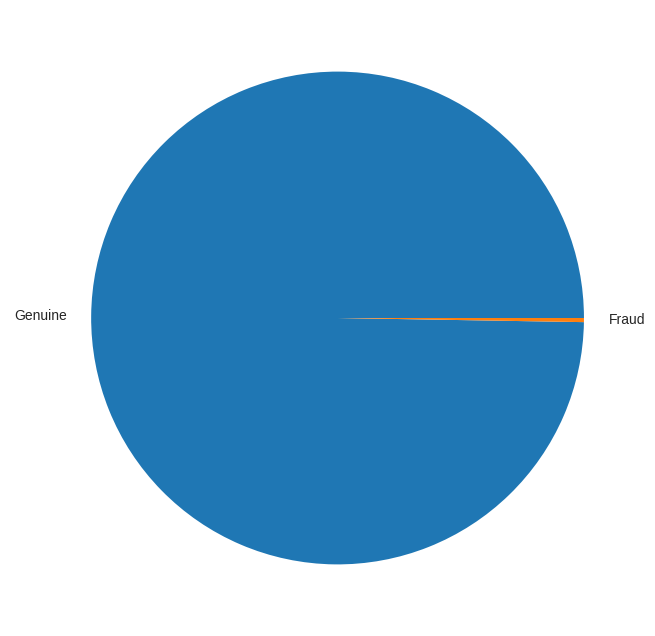

In [ ]:
# plot a pie chart
data_p[" "].value_counts().plot(kind="pie")

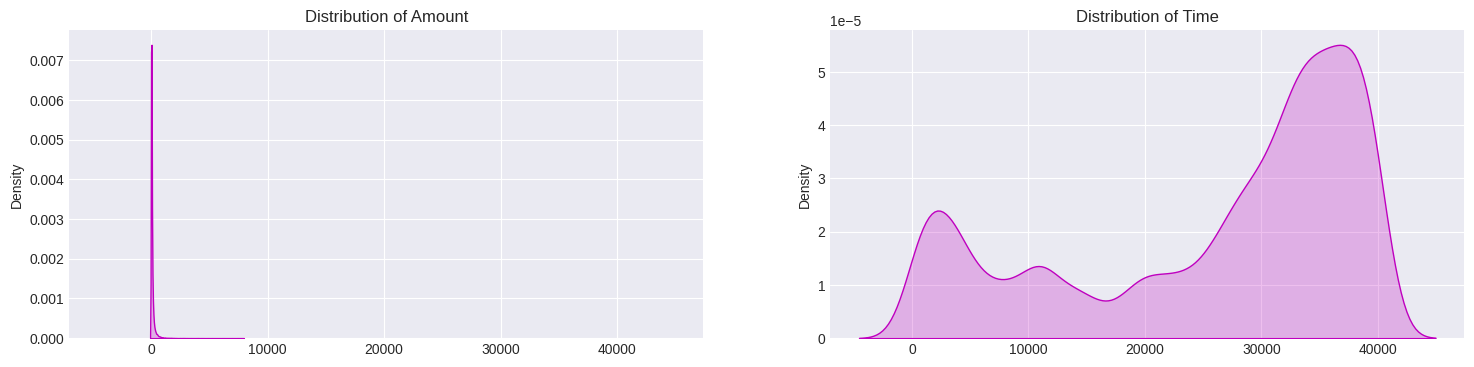

In [ ]:
# plot the named features
f, axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)
amount_value = dataset['Amount'].values # values
time_value = dataset['Time'].values # values
sns.distplot(amount_value, hist=False, color="m", kde_kws={"shade": True},
ax=axes[0]).set_title('Distribution of Amount')
sns.distplot(time_value, hist=False, color="m", kde_kws={"shade": True},
ax=axes[1]).set_title('Distribution of Time')
plt.show()

In [ ]:
print("Summary of the feature - Amount" + "\n-------------------------------")
print(dataset["Amount"].describe())

Summary of the feature - Amount
-------------------------------
count   40772.000000
mean       88.613110
std       237.094596
min         0.000000
25%         7.447500
50%        23.900000
75%        79.950000
max      7879.420000
Name: Amount, dtype: float64


In [ ]:
# Reorder the columns Amount, Time then the rest
data_plot = dataset.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)


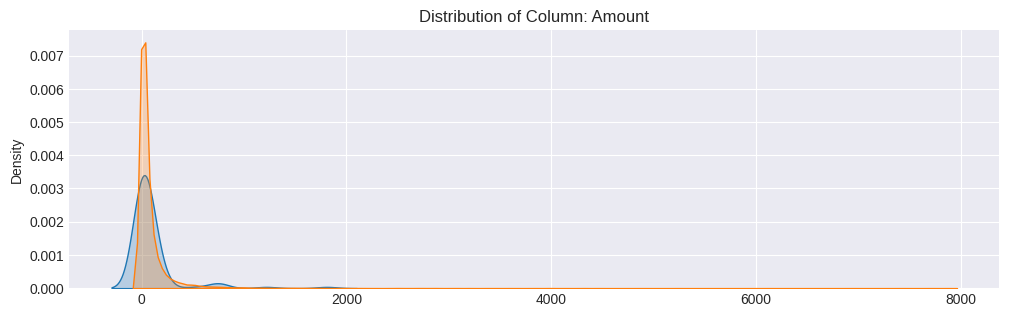

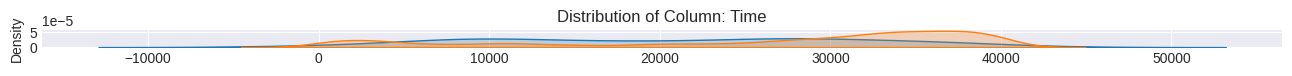

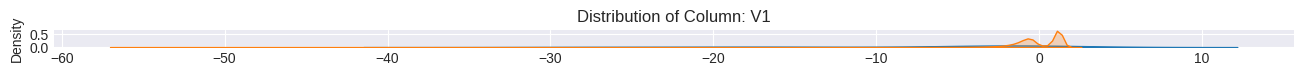

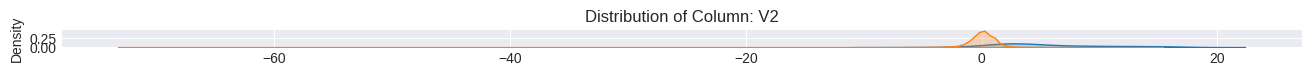

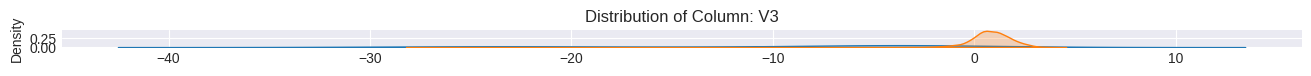

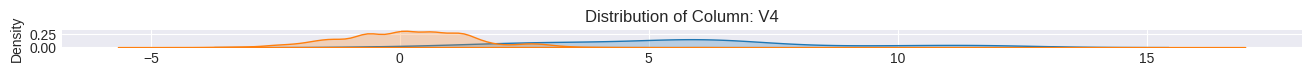

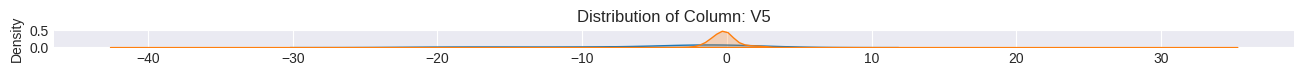

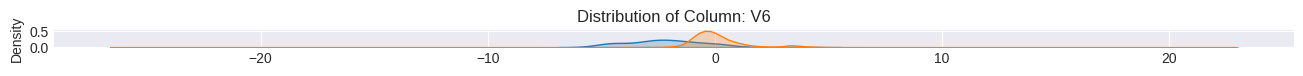

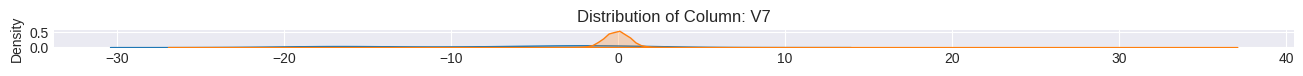

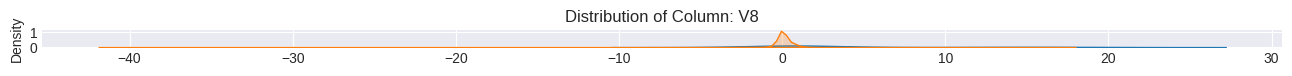

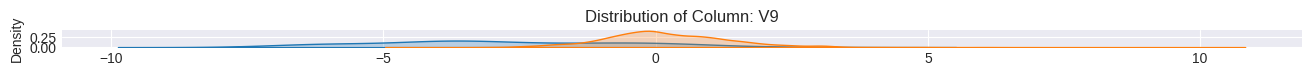

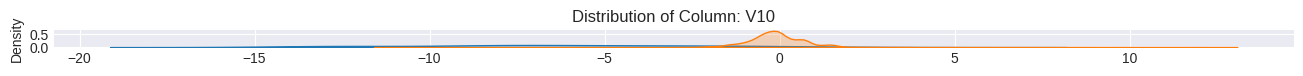

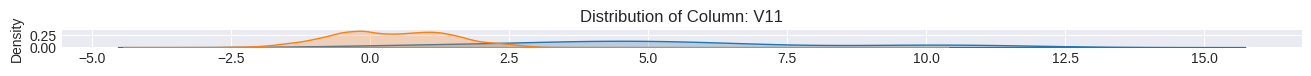

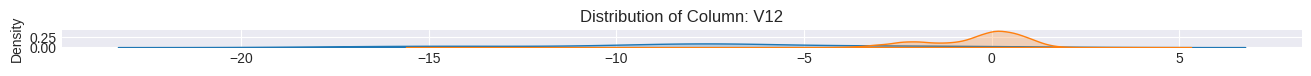

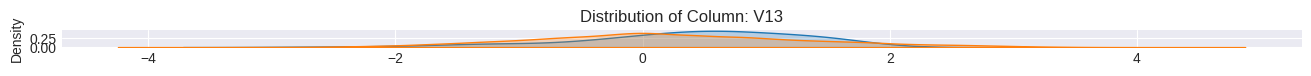

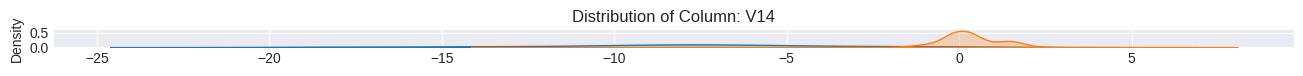

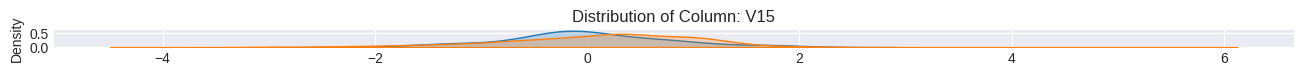

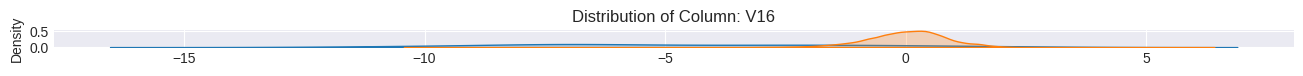

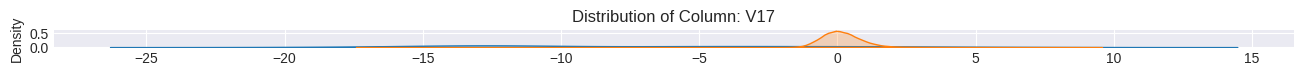

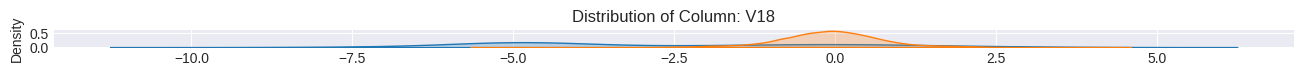

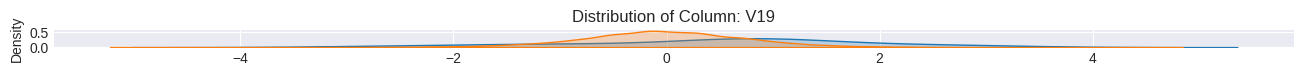

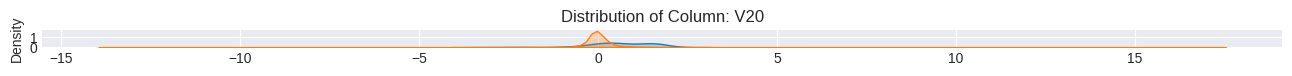

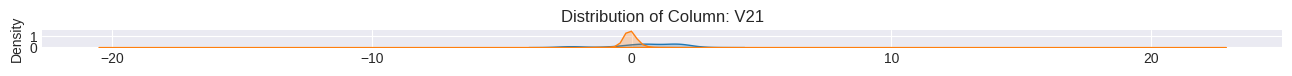

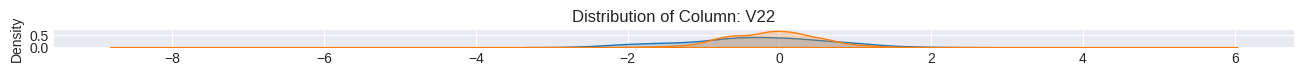

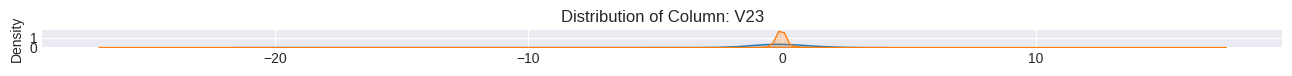

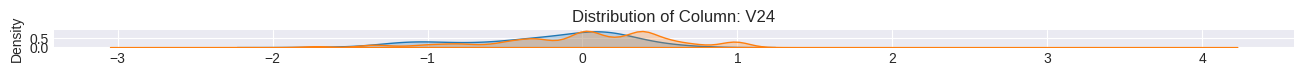

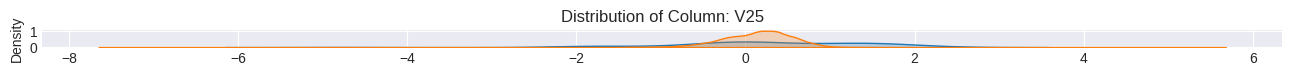

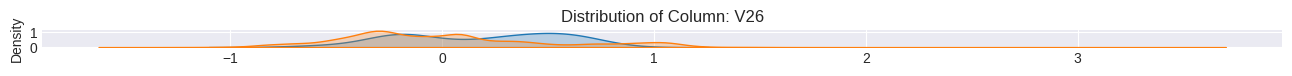

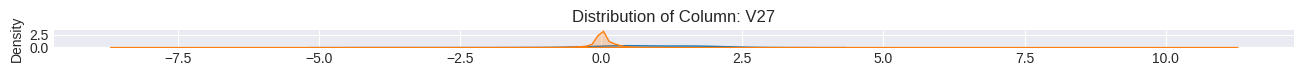

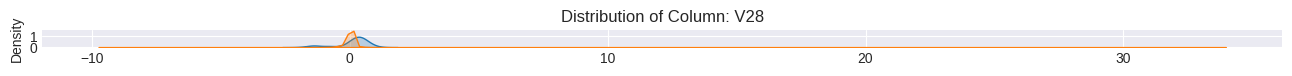

In [ ]:
# Plot the distributions of the features
columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
 sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: " + str(index))
 plt.show()

In [ ]:
# check for null values
dataset.isnull().shape[0]
print("Non-missing values: " + str(dataset.isnull().shape[0]))
print("Missing values: " + str(dataset.shape[0] -
dataset.isnull().shape[0]))


Non-missing values: 40773
Missing values: 0


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(dataset[["Time", "Amount"]])
dataset[["Time", "Amount"]] = scaler.transform(dataset[["Time", "Amount"]])
dataset.head().append(dataset.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.531667,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.734009,0.000000
1,-1.531667,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.292542,0.000000
2,-1.531617,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.893073,0.000000
3,-1.531617,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.373746,0.000000
4,-1.531568,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.635702,1.000000
40768,0.463788,0.180367,-2.320091,-2.393357,-0.099322,1.438798,3.376369,0.420557,0.468550,-1.594167,0.669268,-0.379698,-0.284688,0.296604,0.708456,0.767058,-1.264489,-0.547971,1.551501,-0.903619,0.884375,-0.019143,-1.169199,-0.669946,0.998749,0.653483,-0.332582,-0.104583,0.122331,8.684666,0.000000
40769,0.463838,-0.347533,0.462031,0.413834,-1.403547,0.251277,-0.201277,0.706570,-0.173221,-1.638856,-0.182500,-0.389412,-0.704181,1.084273,-1.255112,0.696604,1.175968,0.937125,-1.605292,0.756624,0.183176,-0.217763,-0.738272,0.144049,-0.878037,-0.615576,-0.686502,0.064940,0.161659,0.782732,0.000000
40770,0.463838,1.071611,0.067492,0.283197,1.243709,0.024615,0.109673,0.129178,-0.026332,0.126973,-0.147706,-0.682271,0.743529,0.845053,-0.036281,0.386927,-0.293810,-0.155941,-0.844177,-0.323537,0.020306,-0.165087,-0.433136,-0.080091,-0.423704,0.522372,-0.446441,0.036590,0.030713,0.678597,0.000000
40771,0.463838,-2.687835,1.069146,1.543733,-1.521685,-0.041831,0.331681,1.302125,-0.826599,0.741611,4.350821,1.695216,-0.201352,0.000991,-1.528443,0.758162,-1.785771,-0.831674,0.861643,-0.811404,0.909401,-1.271315,-1.318991,-0.126223,-0.400434,0.312811,0.023125,0.320880,0.045527,0.704803,0.000000
40772,0.463838,1.087233,-0.919047,0.097149,0.185226,-0.404768,0.986686,-0.612788,0.126250,-0.750372,0.769742,-0.603640,0.665079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier


In [ ]:
fi = ExtraTreesClassifier(n_estimators=10, random_state=42)

In [ ]:
import numpy as np

print(np.shape(X))

(5, 2)


In [ ]:
print(X)

[[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]


In [ ]:
cards = pd.DataFrame({
    'Class': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V9','V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19','V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
                    })

In [ ]:
cards['Class'].value_counts()

V9     2
V1     1
V16    1
V27    1
V26    1
V25    1
V24    1
V23    1
V22    1
V21    1
V20    1
V19    1
V18    1
V17    1
V15    1
V2     1
V14    1
V13    1
V12    1
V11    1
V10    1
V8     1
V7     1
V6     1
V5     1
V4     1
V3     1
V28    1
Name: Class, dtype: int64

In [ ]:
((cards['Class'].value_counts()/len(cards))*100,2)


(V9       7.142857
 V1       3.571429
 V15      3.571429
 V27      3.571429
 V26      3.571429
 V25      3.571429
 V24      3.571429
 V23      3.571429
 V22      3.571429
 V21      3.571429
 V19V20   3.571429
 V18      3.571429
 V17      3.571429
 V16      3.571429
 V14      3.571429
 V2       3.571429
 V13      3.571429
 V12      3.571429
 V11      3.571429
 V10      3.571429
 V8       3.571429
 V7       3.571429
 V6       3.571429
 V5       3.571429
 V4       3.571429
 V3       3.571429
 V28      3.571429
 Name: Class, dtype: float64,
 2)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
fi = ExtraTreesClassifier(n_estimators=10, random_state=42)

In [ ]:
import pandas as pd
import numpy as np

# Assuming X is a NumPy array
X = np.array({
    'Class': ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V9','V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19''V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
            })

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Example NumPy array
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [ ]:
# Create a DataFrame with columns named 'feature_i'
X_df = pd.DataFrame(X, columns=['feature_{}'.format(i) for i in range(X.shape[1])])


In [ ]:
print(X_df)

   feature_0  feature_1  feature_2
0          1          2          3
1          4          5          6
2          7          8          9


In [ ]:
X_df = pd.DataFrame(X, columns=['feature_{}'.format(i) for i in range(X.shape[1])])


In [ ]:
fi = ExtraTreesClassifier(n_estimators=10, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

In [ ]:
# Sample data
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
Y = np.array([0, 1, 0, 1])  # Sample target variable, adjust according to your data


In [ ]:
# Convert X to DataFrame
X_df = pd.DataFrame(X, columns=['feature_{}'.format(i) for i in range(X.shape[1])])

In [ ]:
# Create and fit the model
fi = ExtraTreesClassifier(n_estimators=10, random_state=42)
fi.fit(X_df, Y)

ExtraTreesClassifier(n_estimators=10, random_state=42)

In [ ]:
# Print feature importances
print(fi.feature_importances_)

[0.6 0.4]


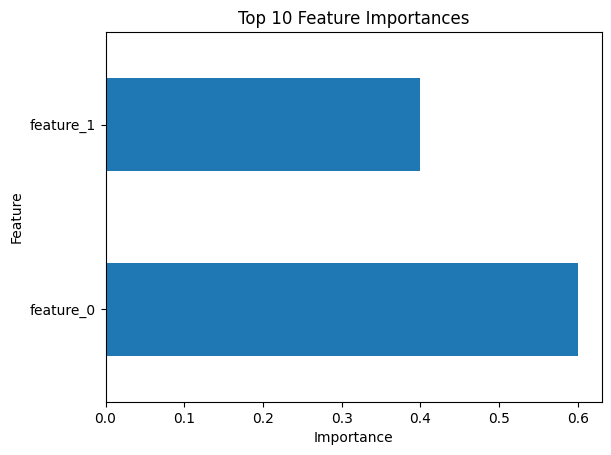

In [ ]:
# Plot the top feature importances
feature_importances = pd.Series(fi.feature_importances_, index=X_df.columns)
top_features = feature_importances.nlargest(10)
top_features.plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
import pandas as pd

# Define some sample data
data = {
    'Class': ['v1', 'v2', 'v1', 'v3', 'v2', 'v1', 'v1', 'v2', 'v3', 'v3']
}

# Create a DataFrame named 'cards'
cards = pd.DataFrame(data)

# Access the value counts of the 'Class' column
class_value_counts = cards['Class'].value_counts()

# Print the value counts
print(class_value_counts)


v1    4
v2    3
v3    3
Name: Class, dtype: int64


In [ ]:
((cards['Class'].value_counts()/len(cards))*100,2)

(v1    40.0
 v2    30.0
 v3    30.0
 Name: Class, dtype: float64,
 2)

In [ ]:
filtered_cards = cards[cards['Class']==1]
print("Number of rows matching the condition:", len(filtered_cards))


Number of rows matching the condition: 0


In [ ]:
# Assuming cards_bal has been defined correctly
# Assuming 'cards' DataFrame is defined
cards_bal = cards[cards['Class'] == 1]  # Filter rows where 'Class' column equals 1




In [ ]:
# Assuming cards_bal has been defined correctly
percentage_distribution = ((cards_bal['Class'].value_counts() / len(cards_bal)) * 100).round(2)
print(percentage_distribution)


Series([], Name: Class, dtype: float64)


In [ ]:
from sklearn.model_selection import train_test_split
X = cards_bal.drop('Class',axis=1)
y = cards_bal['Class']


In [ ]:
from sklearn.model_selection import train_test_split

try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    print("Data split successfully.")
except ValueError as e:
    print("Error:", e)
    print("X.shape:", X.shape)
    print("y.shape:", y.shape)


Error: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
X.shape: (0, 0)
y.shape: (0,)


In [ ]:
print(X.shape)
print(y.shape)


(0, 0)
(0,)


In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (0, 0)
Shape of y: (0,)


In [ ]:
from sklearn.model_selection import train_test_split

# Create some data
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [0, 1, 0, 1, 0]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Print the training and test sets (optional)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)


X_train: [[1, 2], [7, 8], [3, 4]]
X_test: [[5, 6], [9, 10]]
y_train: [0, 1, 1]
y_test: [0, 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
decision_trees_predictions = dtree.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
random_forests_predictions = rfc.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

# ... (your code before the loop)

# Adjust the loop range to avoid exceeding n_samples
for i in range(1, min(40, len(X_train))):  # Ensure i <= n_samples
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate = np.mean(pred_i != y_test)
    df = pd.DataFrame({'K': [i], 'Error Rate': [error_rate]})
    error_rate_df = pd.concat([error_rate_df, df], ignore_index=True)

# Display the DataFrame
print(error_rate_df)


   K  Error Rate
0  1         1.0
1  2         0.5
2  3         0.5
3  1         1.0
4  2         0.5


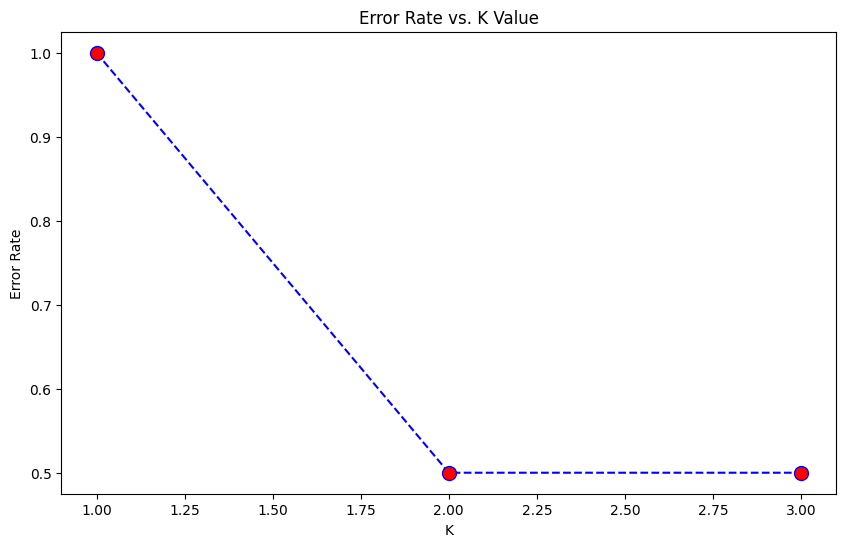

In [ ]:
import matplotlib.pyplot as plt  # Import the plotting library

# ... (your code using error_rate_df)

plt.figure(figsize=(10, 6))  # Create a figure
plt.plot(error_rate_df['K'], error_rate_df['Error Rate'], color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)  # Plot the data
plt.title('Error Rate vs. K Value')  # Set title
plt.xlabel('K')  # Set x-axis label
plt.ylabel('Error Rate')  # Set y-axis label
plt.show()  # Display the plot


In [ ]:
print(error_rate_df.head())  # Print the first few rows of the DataFrame
print(error_rate_df.shape)   # Print the shape of the DataFrame


Empty DataFrame
Columns: [K, Error Rate]
Index: []
(0, 2)


In [ ]:
import pandas as pd

error_rate_df = pd.DataFrame({'Error Rate': [0.1, 0.2, 0.2, 0.3, 0.1], 'K': [1, 2, 3, 4, 5]})

def get_min_error_rate_k(df):
    """
    Extracts the 'K' values corresponding to the minimum 'Error Rate' in the DataFrame.

    Args:
        df (pandas.DataFrame): The input DataFrame containing 'Error Rate' and 'K' columns.

    Returns:
        pandas.Series: A Series containing the 'K' values for the minimum error rates,
                       or None if there's no data or all error rates are equal.
    """

    if df.empty:
        print("DataFrame is empty. No results to return.")
        return None

    # Handle cases where all error rates might be equal (preventing empty Series)
    min_error_rate = df['Error Rate'].min()
    if df['Error Rate'].nunique() == 1:  # Check for all elements having the same value
        print("All error rates are equal. Returning all 'K' values.")
        return df['K']

    return df[df['Error Rate'] == min_error_rate]['K']

result = get_min_error_rate_k(error_rate_df.copy())
print(result)



0    1
4    5
Name: K, dtype: int64


In [ ]:
k = error_rate_df[error_rate_df['Error Rate'] == min(error_rate_df['Error Rate'])]['K']

In [ ]:
#It is possible there may be multiple k values
if len(k)>1:
 #In case there are multiple k values we resent the index and select the first k value
 k = k.reset_index()
 k = int(k["K"][0])
else:
 k = int(k)
print("The error rate appears to be the lowest when k =", k,"Let's train the model with this k value.")

The error rate appears to be the lowest when k = 1 Let's train the model with this k value.


In [ ]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd  # If you're using pandas DataFrames
import numpy as np   # If you're using NumPy arrays


In [ ]:
# Choose an appropriate value for k (number of neighbors)
k = 5  # Example value, adjust based on your analysis

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=k)


In [ ]:
# Fit the KNN model on the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your training and test data prepared

# Choose an appropriate number of neighbors (k) based on n_samples
k = 2  # Example value, adjust based on your data

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
knn_predictions = knn.predict(X_test)

# Now you can use knn_predictions for further analysis



In [ ]:
#Importing K Means classifier
from sklearn.cluster import KMeans

In [ ]:
#Create an instance of the K Means classifier and fit it to our training data
#We only have two target values 1 and 0 so we set the number of clusters to 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)